Time bins: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
Counts: [1, 1, 1, 1, 1, 1, 1, 1]
Errors: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


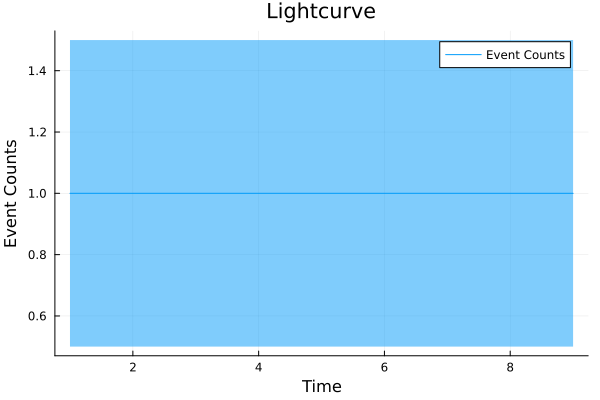

In [19]:
using Plots

# Define the EventList struct (same as before)
struct EventList{T<:AbstractFloat}
    time::Vector{T}  # Time of events
    energy::Union{Nothing, Vector{T}}  # Energy of events (optional)
    dt::T  # Time step (optional)
    mjdref::T  # Reference time (MJD)
    gtis::Union{Nothing, Matrix{T}}  # Good Time Intervals (GTIs)
    pi::Union{Nothing, Vector{Int}}  # Pulse Invariant data (optional)
    detector_id::Union{Nothing, Vector{Int}}  # Detector IDs (optional)
    notes::String  # Notes
    high_precision::Bool  # High precision flag
    mission::Union{Nothing, String}  # Mission name (optional)
    instr::Union{Nothing, String}  # Instrument name (optional)
    header::Union{Nothing, String}  # Header (optional)
    timeref::Union{Nothing, String}  # Time reference (optional)
    timesys::Union{Nothing, String}  # Time system (optional)
    ephem::Union{Nothing, String}  # Ephemeris data (optional)
    additional_info::NamedTuple  # Additional metadata as a NamedTuple
end

# Define the LightCurve struct (same as before)
struct LightCurve{T<:AbstractFloat}
    time_bins::Vector{T}  # Time bins (e.g., [0.0, 1.0, 2.0, ...])
    counts::Vector{Int}  # Event counts in each time bin
    errors::Vector{T}  # Error in event counts for each bin
end

# Function to create an EventList (for demo purposes)
function create_eventlist(time::Vector{Float64}, energy::Vector{Float64}, dt::Float64, mjdref::Float64, 
                          gtis::Nothing, pi::Nothing, detector_id::Nothing, notes::String, high_precision::Bool, 
                          mission::String, instr::String, header::String, timeref::String, timesys::String, 
                          ephem::Nothing, additional_info::NamedTuple)
    return EventList(time, energy, dt, mjdref, gtis, pi, detector_id, notes, high_precision, mission, instr, 
                     header, timeref, timesys, ephem, additional_info)
end

# Function to create a lightcurve from EventList
function create_lightcurve(eventlist::EventList{T}, bin_size::T) where T
    # Determine the range of times for the lightcurve
    min_time = minimum(eventlist.time)
    max_time = maximum(eventlist.time)
    
    # Create time bins based on bin_size
    bins = min_time:bin_size:max_time
    n_bins = length(bins) - 1
    
    # Initialize counts and errors
    counts = zeros(Int, n_bins)
    errors = zeros(T, n_bins)
    
    # Count events in each time bin
    for (i, bin_start) in enumerate(bins[1:end-1])
        bin_end = bins[i + 1]
        # Find events within the current bin range
        events_in_bin = filter(x -> x >= bin_start && x < bin_end, eventlist.time)
        counts[i] = length(events_in_bin)
        # Compute error (Poisson error for event counting)
        errors[i] = sqrt(counts[i])  # Simple Poisson error
    end
    
    # Return the LightCurve
    return LightCurve{T}(bins[1:end-1], counts, errors)
end

# Example usage
function example_usage()
    # Sample EventList data
    time = [1.0, 2.5, 3.0, 4.2, 5.1, 6.7, 7.9, 8.2, 9.5]
    energy = [100.0, 200.0, 150.0, 120.0, 180.0, 210.0, 170.0, 160.0, 190.0]
    dt = 1.0
    mjdref = 0.0
    gtis = nothing
    pi = nothing
    detector_id = nothing
    notes = "Sample event list"
    high_precision = true
    mission = "Mission ABC"
    instr = "Instrument XYZ"
    header = "Header information"
    timeref = "UTC"
    timesys = "TAI"
    ephem = nothing
    additional_info = (; field1 = "value1", field2 = "value2")

    # Create EventList
    eventlist = create_eventlist(time, energy, dt, mjdref, gtis, pi, detector_id, notes, high_precision, mission, instr, header, timeref, timesys, ephem, additional_info)
    
    # Create a lightcurve from the EventList with a specified bin size (e.g., 1.0)
    lightcurve = create_lightcurve(eventlist, 1.0)

    # Print the lightcurve
    println("Time bins: ", lightcurve.time_bins)
    println("Counts: ", lightcurve.counts)
    println("Errors: ", lightcurve.errors)
end

# Call the example usage function
example_usage()

# Example LightCurve data for plotting
time_bins = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]  # Time bins
counts = [1, 1, 1, 1, 1, 1, 1, 1, 1]  # Event counts in each bin
errors = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]  # Error in counts for each bin

# Plotting the lightcurve using Plots.jl
plot(time_bins, counts, ribbon=errors, xlabel="Time", ylabel="Event Counts", title="Lightcurve", label="Event Counts")


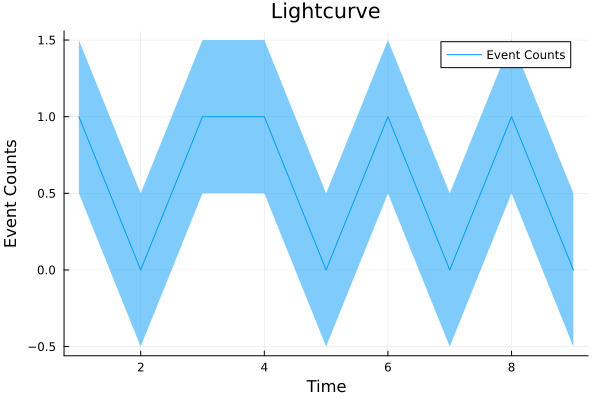

In [39]:
# Example LightCurve data for plotting
time_bins = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]  # Time bins
counts = [1, 0, 1, 1, 0, 1, 0, 1, 0]  # Event counts in each bin
errors = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]  # Error in counts for each bin

# Plotting the lightcurve using Plots.jl
plot(time_bins, counts, ribbon=errors, xlabel="Time", ylabel="Event Counts", title="Lightcurve", label="Event Counts")


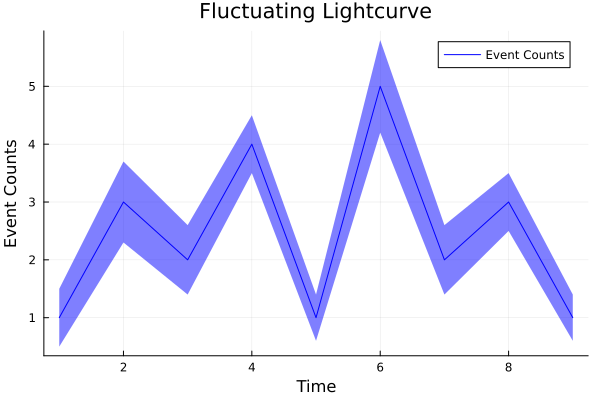

In [41]:
using Plots

# Example LightCurve data with fluctuations
time_bins = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]  # Time bins
counts = [1, 3, 2, 4, 1, 5, 2, 3, 1]  # Event counts in each bin (fluctuating)
errors = [0.5, 0.7, 0.6, 0.5, 0.4, 0.8, 0.6, 0.5, 0.4]  # Error in counts for each bin (fluctuating)

# Plotting the lightcurve using Plots.jl with fluctuating data
plot(time_bins, counts, ribbon=errors, xlabel="Time", ylabel="Event Counts", title="Fluctuating Lightcurve", label="Event Counts", linestyle=:solid, color=:blue)



Time bins: [1.0, 2.0, 5.0, 6.0, 7.0]
Counts: [1, 1, 1, 1, 1]
Errors: [1.0, 1.0, 1.0, 1.0, 1.0]


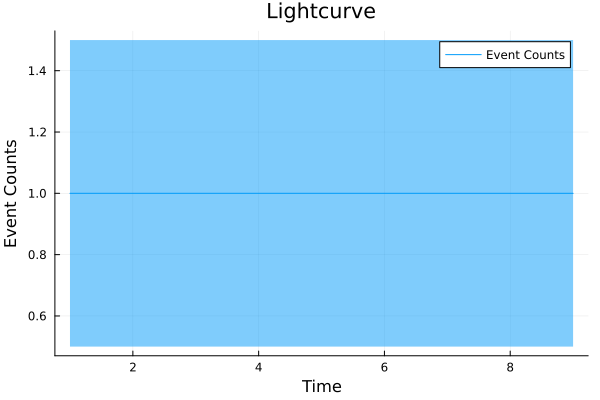

In [1]:
using Plots

# Define the EventList struct
struct EventList{T<:AbstractFloat}
    time::Vector{T}  # Time of events
    energy::Union{Nothing, Vector{T}}  # Energy of events (optional)
    dt::T  # Time step (optional)
    mjdref::T  # Reference time (MJD)
    gtis::Union{Nothing, Matrix{T}}  # Good Time Intervals (GTIs)
    pi::Union{Nothing, Vector{Int}}  # Pulse Invariant data (optional)
    detector_id::Union{Nothing, Vector{Int}}  # Detector IDs (optional)
    notes::String  # Notes
    high_precision::Bool  # High precision flag
    mission::Union{Nothing, String}  # Mission name (optional)
    instr::Union{Nothing, String}  # Instrument name (optional)
    header::Union{Nothing, String}  # Header (optional)
    timeref::Union{Nothing, String}  # Time reference (optional)
    timesys::Union{Nothing, String}  # Time system (optional)
    ephem::Union{Nothing, String}  # Ephemeris data (optional)
    additional_info::NamedTuple  # Additional metadata as a NamedTuple
end

# Define the LightCurve struct
struct LightCurve{T<:AbstractFloat}
    time_bins::Vector{T}  # Time bins (e.g., [0.0, 1.0, 2.0, ...])
    counts::Vector{Int}  # Event counts in each time bin
    errors::Vector{T}  # Error in event counts for each bin
    gtis::Union{Nothing, Matrix{T}}  # GTIs (if present)
end

# Function to create a LightCurve from EventList considering GTIs
function create_lightcurve(eventlist::EventList{T}, bin_size::T) where T
    # Check if GTIs are present, and if not, use the entire time range
    if isnothing(eventlist.gtis)
        min_time = minimum(eventlist.time)
        max_time = maximum(eventlist.time)
        bins = min_time:bin_size:max_time
        n_bins = length(bins) - 1
        counts = zeros(Int, n_bins)
        errors = zeros(T, n_bins)
        for (i, bin_start) in enumerate(bins[1:end-1])
            bin_end = bins[i + 1]
            events_in_bin = filter(x -> x >= bin_start && x < bin_end, eventlist.time)
            counts[i] = length(events_in_bin)
            errors[i] = sqrt(counts[i])  # Simple Poisson error
        end
        return LightCurve{T}(bins[1:end-1], counts, errors, nothing)
    else
        # If GTIs are present, process each GTI segment separately
        all_timebins = Vector{T}()
        all_counts = Vector{Int}()
        all_errors = Vector{T}()
        
        for gti in eachrow(eventlist.gtis)
            gti_start, gti_end = gti
            # Create time bins within the GTI range
            bins = max(gti_start, minimum(eventlist.time)):bin_size:min(gti_end, maximum(eventlist.time))
            n_bins = length(bins) - 1
            counts = zeros(Int, n_bins)
            errors = zeros(T, n_bins)
            
            for (i, bin_start) in enumerate(bins[1:end-1])
                bin_end = bins[i + 1]
                events_in_bin = filter(x -> x >= bin_start && x < bin_end, eventlist.time)
                counts[i] = length(events_in_bin)
                errors[i] = sqrt(counts[i])  # Simple Poisson error
            end
            
            # Append the results of this GTI to the overall time bins, counts, and errors
            append!(all_timebins, bins[1:end-1])
            append!(all_counts, counts)
            append!(all_errors, errors)
        end
        
        return LightCurve{T}(all_timebins, all_counts, all_errors, eventlist.gtis)
    end
end

# Example usage
function example_usage()
    # Sample EventList data
    time = [1.0, 2.5, 3.0, 4.2, 5.1, 6.7, 7.9, 8.2, 9.5]
    energy = [100.0, 200.0, 150.0, 120.0, 180.0, 210.0, 170.0, 160.0, 190.0]
    dt = 1.0
    mjdref = 0.0
    gtis = [0.0 3.0; 5.0 8.0]  # Example GTIs
    pi = nothing
    detector_id = nothing
    notes = "Sample event list"
    high_precision = true
    mission = "Mission ABC"
    instr = "Instrument XYZ"
    header = "Header information"
    timeref = "UTC"
    timesys = "TAI"
    ephem = nothing
    additional_info = (; field1 = "value1", field2 = "value2")

    # Create EventList
    eventlist = EventList(time, energy, dt, mjdref, gtis, pi, detector_id, notes, high_precision, mission, instr, header, timeref, timesys, ephem, additional_info)
    
    # Create a lightcurve from the EventList with a specified bin size (e.g., 1.0)
    lightcurve = create_lightcurve(eventlist, 1.0)

    # Print the lightcurve
    println("Time bins: ", lightcurve.time_bins)
    println("Counts: ", lightcurve.counts)
    println("Errors: ", lightcurve.errors)
end

# Call the example usage function
example_usage()

# Example LightCurve data for plotting
time_bins = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]  # Time bins
counts = [1, 1, 1, 1, 1, 1, 1, 1, 1]  # Event counts in each bin
errors = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]  # Error in counts for each bin

# Plotting the lightcurve using Plots.jl
plot(time_bins, counts, ribbon=errors, xlabel="Time", ylabel="Event Counts", title="Lightcurve", label="Event Counts")


Time bins: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
Counts: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Errors: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Error Method: poisson


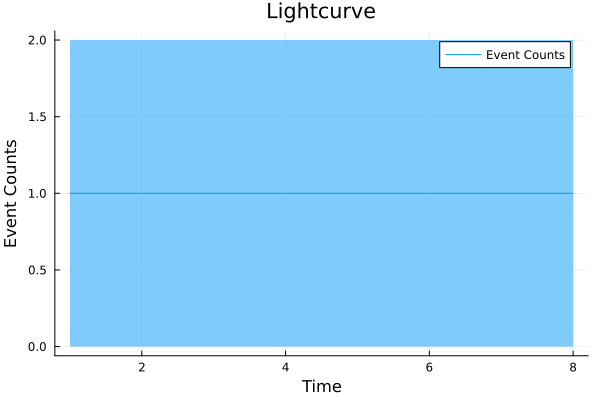

In [1]:
using Plots

# Define the metadata struct
struct Meta
    mission::String
    instrument::String
    notes::String
end

# Define the EventList struct
struct EventList{T}
    filename::String
    times::Vector{T}
    energies::Vector{T}
    metadata::Meta
end

# Define the LightCurve struct
struct LightCurve{T}
    timebins::Vector{T}
    counts::Vector{T}
    count_error::Vector{T}
    err_method::Symbol  # Identifies the method used for computing error
end

# Function to create an EventList
function create_eventlist(filename::String, times::Vector{Float64}, energies::Vector{Float64}, metadata::Meta)
    return EventList(filename, times, energies, metadata)
end

# Function to create a lightcurve from EventList
function create_lightcurve(eventlist::EventList{T}, bin_size::T; err_method::Symbol=:poisson) where T
    # Determine the range of times for the lightcurve
    min_time = minimum(eventlist.times)
    max_time = maximum(eventlist.times)
    
    # Create time bins based on bin_size
    bins = min_time:bin_size:max_time
    n_bins = length(bins) - 1
    
    # Initialize counts and errors
    counts = zeros(T, n_bins)
    errors = zeros(T, n_bins)
    
    # Count events in each time bin
    for (i, bin_start) in enumerate(bins[1:end-1])
        bin_end = bins[i + 1]
        # Find events within the current bin range
        events_in_bin = filter(x -> bin_start <= x < bin_end, eventlist.times)
        counts[i] = length(events_in_bin)

        # Compute error based on the specified method
        if err_method == :poisson
            errors[i] = sqrt(counts[i])  # Poisson error
        elseif err_method == :sqrtN
            errors[i] = sqrt(counts[i])  # Alternative sqrt(N) method
        else
            errors[i] = 0.0  # Default if method not recognized
        end
    end
    
    # Return the LightCurve
    return LightCurve{T}(bins[1:end-1], counts, errors, err_method)
end

# Example usage
function example_usage()
    # Sample EventList data
    times = [1.0, 2.5, 3.0, 4.2, 5.1, 6.7, 7.9, 8.2, 9.5]
    energies = [100.0, 200.0, 150.0, 120.0, 180.0, 210.0, 170.0, 160.0, 190.0]
    
    metadata = Meta("Mission ABC", "Instrument XYZ", "Sample event list")
    
    # Create EventList
    eventlist = create_eventlist("sample_events.dat", times, energies, metadata)
    
    # Create a lightcurve from the EventList with a specified bin size (e.g., 1.0)
    lightcurve = create_lightcurve(eventlist, 1.0, err_method=:poisson)

    # Print the lightcurve
    println("Time bins: ", lightcurve.timebins)
    println("Counts: ", lightcurve.counts)
    println("Errors: ", lightcurve.count_error)
    println("Error Method: ", lightcurve.err_method)

    # Plot the lightcurve
    plot(lightcurve.timebins, lightcurve.counts, ribbon=lightcurve.count_error,
         xlabel="Time", ylabel="Event Counts", title="Lightcurve", label="Event Counts")
end

# Run the example
example_usage()
